In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def mean_scores(results):
    '''Return Train/Test Mean Score from a Cross Val'''
    return print(f'''Mean Train Score: {results['train_score'].mean()}
Mean Test Score: {results['test_score'].mean()}''')

In [2]:
with open('data/pickles/testcombined.p', 'rb') as readfile: 
    test_combined = pickle.load(readfile)

In [7]:
list(test_combined.columns)

['SEASON_ID',
 'TEAM_ID_Home',
 'TEAM_ABBREVIATION_Home',
 'TEAM_NAME_Home',
 'GAME_ID',
 'GAME_DATE',
 'MATCHUP_Home',
 'WL_Home',
 'MIN_Home',
 'PTS_Home',
 'FGM_Home',
 'FGA_Home',
 'FG_PCT_Home',
 'FG3M_Home',
 'FG3A_Home',
 'FG3_PCT_Home',
 'FTM_Home',
 'FTA_Home',
 'FT_PCT_Home',
 'OREB_Home',
 'DREB_Home',
 'REB_Home',
 'AST_Home',
 'STL_Home',
 'BLK_Home',
 'TOV_Home',
 'PF_Home',
 'PLUS_MINUS_Home',
 'E_OFF_RATING_Team_Home',
 'OFF_RATING_Team_Home',
 'E_DEF_RATING_Team_Home',
 'DEF_RATING_Team_Home',
 'E_NET_RATING_Team_Home',
 'NET_RATING_Team_Home',
 'AST_PCT_Team_Home',
 'AST_TOV_Team_Home',
 'AST_RATIO_Team_Home',
 'OREB_PCT_Team_Home',
 'DREB_PCT_Team_Home',
 'REB_PCT_Team_Home',
 'E_TM_TOV_PCT_Home',
 'TS_PCT_Team_Home',
 'USG_PCT_Team_Home',
 'E_USG_PCT_Team_Home',
 'E_PACE_Team_Home',
 'PACE_Team_Home',
 'PACE_PER40_Team_Home',
 'POSS_Team_Home',
 'PIE_Team_Home',
 'EFG_PCT_Team_Home',
 'FTA_RATE_Home',
 'TM_TOV_PCT_Team_Home',
 'OPP_EFG_PCT_Home',
 'OPP_FTA_RATE_Home

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
train_set, test_set = train_test_split(test_combined, test_size=.15, random_state=42)

In [155]:
basic_stats_columns = ['PTS LAST 7_Home',
'REB LAST 7_Home',
'AST LAST 7_Home',
'STL LAST 7_Home',
'BLK LAST 7_Home',
'TOV LAST 7_Home',
'PLUS_MINUS LAST 7_Home',
'FGA LAST 7_Home',
'FG_PCT LAST 7_Home',
'FG3A LAST 7_Home',
'FG3_PCT LAST 7_Home',
'FTA LAST 7_Home',
'FT_PCT LAST 7_Home',
'WIN_%_Home',
'back_to_back_Home',
'PTS LAST 7_Away',
 'REB LAST 7_Away',
 'AST LAST 7_Away',
 'STL LAST 7_Away',
 'BLK LAST 7_Away',
 'TOV LAST 7_Away',
 'PLUS_MINUS LAST 7_Away',
 'FGA LAST 7_Away',
 'FG_PCT LAST 7_Away',
 'FG3A LAST 7_Away',
 'FG3_PCT LAST 7_Away',
 'FTA LAST 7_Away',
 'FT_PCT LAST 7_Away',
'WIN_%_Away',
'back_to_back_Away']

advanced_stats_columns = ['PIE LAST 7_Home',
 'OFF_RATING LAST 7_Home',
 'DEF_RATING LAST 7_Home',
 'NET_RATING LAST 7_Home',
 'TS_PCT LAST 7_Home',
 'PACE LAST 7_Home',
 'AST_TOV LAST 7_Home',
'EFG_PCT LAST 7_Home',
'REB_PCT LAST 7_Home',
'REB_PCT LAST 7_Away',
 'PIE LAST 7_Away',
 'OFF_RATING LAST 7_Away',
 'DEF_RATING LAST 7_Away',
 'NET_RATING LAST 7_Away',
 'TS_PCT LAST 7_Away',
 'PACE LAST 7_Away',
 'AST_TOV LAST 7_Away',
'OFF_RATING Season_Players_Home',
 'DEF_RATING Season_Players_Home',
 'NET_RATING Season_Players_Home',
 'EFG_PCT Season_Players_Home',
'OFF_RATING Season_Players_Away',
 'DEF_RATING Season_Players_Away',
 'NET_RATING Season_Players_Away',
 'EFG_PCT Season_Players_Away',
'WIN_%_Home',
'WIN_%_Away']

four_factors_szn_columns = ['EFG_PCT Season_Team_Home',
 'FTA_RATE Season_Home',
 'TM_TOV_PCT Season_Home',
 'OREB_PCT Season_Home',
 'OPP_EFG_PCT Season_Home',
 'OPP_FTA_RATE Season_Home',
 'OPP_TOV_PCT Season_Home',
 'OPP_OREB_PCT Season_Home',
'EFG_PCT Season_Team_Away',
 'FTA_RATE Season_Away',
 'TM_TOV_PCT Season_Away',
 'OREB_PCT Season_Away',
 'OPP_EFG_PCT Season_Away',
 'OPP_FTA_RATE Season_Away',
 'OPP_TOV_PCT Season_Away',
 'OPP_OREB_PCT Season_Away',
'WIN_%_Home',
'back_to_back_Home',
'WIN_%_Away',
'back_to_back_Away',
'OFF_RATING Season_Players_Home',
 'DEF_RATING Season_Players_Home',
 'NET_RATING Season_Players_Home',
'OFF_RATING Season_Team_Away',
 'DEF_RATING Season_Team_Away',
 'NET_RATING Season_Team_Away']

simple_combo_cols = [
'PTS LAST 7_Home',
'TOV LAST 7_Home',
'STL LAST 7_Home',
 'REB_PCT LAST 7_Home',
'PIE LAST 7_Home',
 'OFF_RATING LAST 7_Home',
 'DEF_RATING LAST 7_Home',
'EFG_PCT Season_Team_Home',
'OPP_EFG_PCT Season_Home',
'PTS LAST 7_Away',
'TOV LAST 7_Away',
'STL LAST 7_Away',
 'REB_PCT LAST 7_Away',
'PIE LAST 7_Away',
 'OFF_RATING LAST 7_Away',
 'DEF_RATING LAST 7_Away',
'EFG_PCT Season_Team_Away',
'OPP_EFG_PCT Season_Away',
'WIN_%_Home',
'back_to_back_Home',
'WIN_%_Away',
'back_to_back_Away']

first_best_cols = ['EFG_PCT LAST 7_Home',
'FTA_RATE LAST 7_Home',
'TM_TOV_PCT LAST 7_Home',
'OREB_PCT LAST 7_Home',
'OPP_EFG_PCT LAST 7_Home',
'OPP_FTA_RATE LAST 7_Home',
'OPP_TOV_PCT LAST 7_Home',
'OPP_OREB_PCT LAST 7_Home',
'EFG_PCT LAST 7_Away',
'FTA_RATE LAST 7_Away',
'TM_TOV_PCT LAST 7_Away',
'OREB_PCT LAST 7_Away',
'OPP_EFG_PCT LAST 7_Away',
'OPP_FTA_RATE LAST 7_Away',
'OPP_TOV_PCT LAST 7_Away',
'OPP_OREB_PCT LAST 7_Away',
'OFF_RATING Season_Players_Home',
 'DEF_RATING Season_Players_Home',
 'NET_RATING Season_Players_Home',
 'EFG_PCT Season_Players_Home',
'OFF_RATING Season_Players_Away',
 'DEF_RATING Season_Players_Away',
 'NET_RATING Season_Players_Away',
 'EFG_PCT Season_Players_Away',
'PIE Season_Players_Home',
'PIE Season_Players_Away',
'WIN_%_Home',
'back_to_back_Home',
'WIN_%_Away',
'back_to_back_Away'
]

In [225]:
all_columns = ['PTS LAST 7_Home',
 'REB LAST 7_Home',
 'AST LAST 7_Home',
 'STL LAST 7_Home',
 'BLK LAST 7_Home',
 'TOV LAST 7_Home',
 'PLUS_MINUS LAST 7_Home',
 'FGA LAST 7_Home',
 'FG_PCT LAST 7_Home',
 'FG3A LAST 7_Home',
 'FG3_PCT LAST 7_Home',
 'FTA LAST 7_Home',
 'FT_PCT LAST 7_Home',
 'EFG_PCT LAST 7_Home',
 'FTA_RATE LAST 7_Home',
 'TM_TOV_PCT LAST 7_Home',
 'OREB_PCT LAST 7_Home',
 'OPP_EFG_PCT LAST 7_Home',
 'OPP_FTA_RATE LAST 7_Home',
 'OPP_TOV_PCT LAST 7_Home',
 'OPP_OREB_PCT LAST 7_Home',
 'REB_PCT LAST 7_Home',
 'PIE LAST 7_Home',
 'OFF_RATING LAST 7_Home',
 'DEF_RATING LAST 7_Home',
 'NET_RATING LAST 7_Home',
 'TS_PCT LAST 7_Home',
 'PACE LAST 7_Home',
 'AST_TOV LAST 7_Home',
 'PTS_ALLOWED LAST 7_Home',
 'PTS Season_Home',
 'REB Season_Home',
 'AST Season_Home',
 'STL Season_Home',
 'BLK Season_Home',
 'TOV Season_Home',
 'PLUS_MINUS Season_Home',
 'FGA Season_Home',
 'FG_PCT Season_Home',
 'FG3A Season_Home',
 'FG3_PCT Season_Home',
 'FTA Season_Home',
 'FT_PCT Season_Home',
 'EFG_PCT Season_Team_Home',
 'FTA_RATE Season_Home',
 'TM_TOV_PCT Season_Home',
 'OREB_PCT Season_Home',
 'OPP_EFG_PCT Season_Home',
 'OPP_FTA_RATE Season_Home',
 'OPP_TOV_PCT Season_Home',
 'OPP_OREB_PCT Season_Home',
 'REB_PCT Season_Team_Home',
 'PIE Season_Team_Home',
 'OFF_RATING Season_Team_Home',
 'DEF_RATING Season_Team_Home',
 'NET_RATING Season_Team_Home',
 'TS_PCT Season_Team_Home',
 'PACE Season_Home',
 'AST_TOV Season_Home',
 'PTS_ALLOWED Season_Home',
 'HOME_TEAM_Home',
'WIN_%_Home',
 'OFF_RATING Season_Players_Home',
 'DEF_RATING Season_Players_Home',
 'NET_RATING Season_Players_Home',
 'EFG_PCT Season_Players_Home',
 'TS_PCT Season_Players_Home',
 'PIE Season_Players_Home',
 'REB_PCT Season_Players_Home',
'ML_Home',
'PTS LAST 7_Away',
 'REB LAST 7_Away',
 'AST LAST 7_Away',
 'STL LAST 7_Away',
 'BLK LAST 7_Away',
 'TOV LAST 7_Away',
 'PLUS_MINUS LAST 7_Away',
 'FGA LAST 7_Away',
 'FG_PCT LAST 7_Away',
 'FG3A LAST 7_Away',
 'FG3_PCT LAST 7_Away',
 'FTA LAST 7_Away',
 'FT_PCT LAST 7_Away',
 'EFG_PCT LAST 7_Away',
 'FTA_RATE LAST 7_Away',
 'TM_TOV_PCT LAST 7_Away',
 'OREB_PCT LAST 7_Away',
 'OPP_EFG_PCT LAST 7_Away',
 'OPP_FTA_RATE LAST 7_Away',
 'OPP_TOV_PCT LAST 7_Away',
 'OPP_OREB_PCT LAST 7_Away',
 'REB_PCT LAST 7_Away',
 'PIE LAST 7_Away',
 'OFF_RATING LAST 7_Away',
 'DEF_RATING LAST 7_Away',
 'NET_RATING LAST 7_Away',
 'TS_PCT LAST 7_Away',
 'PACE LAST 7_Away',
 'AST_TOV LAST 7_Away',
 'PTS_ALLOWED LAST 7_Away',
 'PTS Season_Away',
 'REB Season_Away',
 'AST Season_Away',
 'STL Season_Away',
 'BLK Season_Away',
 'TOV Season_Away',
 'PLUS_MINUS Season_Away',
 'FGA Season_Away',
 'FG_PCT Season_Away',
 'FG3A Season_Away',
 'FG3_PCT Season_Away',
 'FTA Season_Away',
 'FT_PCT Season_Away',
 'EFG_PCT Season_Team_Away',
 'FTA_RATE Season_Away',
 'TM_TOV_PCT Season_Away',
 'OREB_PCT Season_Away',
 'OPP_EFG_PCT Season_Away',
 'OPP_FTA_RATE Season_Away',
 'OPP_TOV_PCT Season_Away',
 'OPP_OREB_PCT Season_Away',
 'REB_PCT Season_Team_Away',
 'PIE Season_Team_Away',
 'OFF_RATING Season_Team_Away',
 'DEF_RATING Season_Team_Away',
 'NET_RATING Season_Team_Away',
 'TS_PCT Season_Team_Away',
 'PACE Season_Away',
 'AST_TOV Season_Away',
 'PTS_ALLOWED Season_Away',
 'HOME_TEAM_Away',
'OFF_RATING Season_Players_Away',
 'DEF_RATING Season_Players_Away',
 'NET_RATING Season_Players_Away',
 'EFG_PCT Season_Players_Away',
 'TS_PCT Season_Players_Away',
 'PIE Season_Players_Away',
 'REB_PCT Season_Players_Away',
'ML_Away',
'AST_PCT Season_Home',
 'AST_PCT Season_Away']

In [ ]:
Using the tuned parameters lets check out how our model fares with the test data

### Basic Stats (last 7) Winner Model

In [9]:
X_train = train_set[basic_stats_columns]
y_train = train_set.WIN_Home

In [10]:
X_test = test_set[basic_stats_columns]
y_test = test_set.WIN_Home

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
ss = StandardScaler()

X_sc_train = ss.fit_transform(X_train)
X_sc_test = ss.fit_transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)

mean_scores(cross_validate(lr, X_sc_train, y_train, return_train_score=True))
mean_scores(cross_validate(lr, X_train, y_train, return_train_score=True))

Mean Train Score: 0.6745484326968384
Mean Test Score: 0.661381486296176
Mean Train Score: 0.6740878160547762
Mean Test Score: 0.663229200519987


In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)

mean_scores(cross_validate(rfc, X_sc_train, y_train, return_train_score=True))

Mean Train Score: 1.0
Mean Test Score: 0.6577036615751273


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

mean_scores(cross_validate(gnb, X_sc_train, y_train, return_train_score=True))

Mean Train Score: 0.6481407471726902
Mean Test Score: 0.6444588885277868


In [20]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

mean_scores(cross_validate(svc, X_sc_train, y_train, return_train_score=True))

Mean Train Score: 0.675928038810339
Mean Test Score: 0.6569602426606002


In [28]:
param_grid_lr = {'penalty' : ['l1', 'l2', 'none'], 'C' : [2, 1, .1, .01], 'max_iter': [1000, 5000],
              'solver': ['lbfgs', 'saga', 'liblinear']}

In [29]:
from sklearn.model_selection import GridSearchCV
gr_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr)
gr_lr.fit(X_train, y_train)
gr_lr.best_params_

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_mo

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C a

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/d

{'C': 2, 'max_iter': 1000, 'penalty': 'none', 'solver': 'lbfgs'}

In [35]:
gr_lr = LogisticRegression(C=2, max_iter=1000, penalty='none')
mean_scores(cross_validate(gr_lr, X_train, y_train, return_train_score=True))

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dillmedd/opt/anaconda3/envs/learn

Mean Train Score: 0.6720636853310957
Mean Test Score: 0.6650654046148846


/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
gr_lr.fit(X_sc_train, y_train)

test_set['Test_predictions'] = gr_lr.predict(X_sc_test)

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
<ipython-input-38-1870bfedd270>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Test_predictions'] = gr_lr.predict(X_sc_test)


In [39]:
test_set.reset_index(inplace=True)
#Create a column that displays money won/lost for given game
test_set['Monetary Result'] = 0
for ind in test_set.index:
    # Prediction is correct
    if test_set['Test_predictions'].iloc[ind] == test_set['WIN_Home'].iloc[ind]:
        #HomeTeam Won
        if test_set['WIN_Home'].iloc[ind] == 1:
            #HomeTeam Favored
            if test_set['ML_Home'].iloc[ind] < 0:
                test_set.at[ind, 'Monetary Result'] = (100 / ((abs(test_set['ML_Home'].iloc[ind]))/100))
            #HomeTeam Underdog
            else:
                test_set.at[ind, 'Monetary Result'] = (100 * ((test_set['ML_Home'].iloc[ind])/100))
        #AwayTeam Won
        elif test_set['WIN_Home'].iloc[ind] == 0:
            #AwayTeam Favored
            if test_set['ML_Away'].iloc[ind] < 0:
                test_set.at[ind, 'Monetary Result'] = (100 / ((abs(test_set['ML_Away'].iloc[ind]))/100))
            #AwayTeam Underdog
            else:
                test_set.at[ind, 'Monetary Result'] = (100 * ((test_set['ML_Away'].iloc[ind])/100))
    #Prediction is wrong
    else:    
        test_set.at[ind, 'Monetary Result'] = -100
            

test_set['Profit'] = test_set['Monetary Result'].cumsum()

#Checking the accuracy of the model
len(test_set[test_set['Test_predictions'] == test_set['WIN_Home']])/len(test_set)

<ipython-input-39-619ffe385fc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Monetary Result'] = 0
<ipython-input-39-619ffe385fc2>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Profit'] = test_set['Monetary Result'].cumsum()


0.6270833333333333

### Basic Stats (Last 7) Spread Model

In [40]:
X_train = train_set[basic_stats_columns]
y_train = train_set.PLUS_MINUS_Home
X_test = test_set[basic_stats_columns]
y_test = test_set.PLUS_MINUS_Home

In [41]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cross_val = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lm, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15566
Average Cross Validation Score with Scaled Data: 0.15566


In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01)
lasso.fit(X_train_sc, y_train)
cross_val = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lasso, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15948
Average Cross Validation Score with Scaled Data: 0.15725


In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01)
cross_val = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(ridge, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15626
Average Cross Validation Score with Scaled Data: 0.15567


In [45]:
lasso_param = {'alpha':[2, 1, .5], 'fit_intercept':[True, False], 'normalize':[True, False],
              'max_iter':[500, 1000, 2500]}

In [46]:
gs = GridSearchCV(estimator=Lasso(), param_grid=lasso_param, cv=5, scoring='r2')
gs.fit(X_train, y_train)
gs.best_params_

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2614.3922211449826, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286.40249204688007, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17665.694090947858, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18598.24235795834, tolerance: 44.654532
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29454.557842219336, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19377.730534065864, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/env

{'alpha': 0.5, 'fit_intercept': False, 'max_iter': 500, 'normalize': True}

In [49]:
lasso = Lasso(alpha=.5, max_iter=500, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5, max_iter=500, normalize=True)

In [50]:
#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_lasso = lasso.predict(X_test)
lasso_test_df = pd.DataFrame(y_test)

lasso_test_df['Spread'] = test_set['Spread_Home']
lasso_test_df['Predicted Result'] = y_pred_lasso

In [51]:
lasso_test_df.reset_index(inplace=True)

#Add in result with spread factored in
lasso_test_df['Home Spread Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) < 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
lasso_test_df['Predicted Spread Home Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) <0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

In [54]:
lasso_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

accuracy = len(lasso_test_df[lasso_test_df['Predicted Home Spread Result']==lasso_test_df['Home Spread Result']])/len(lasso_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.49576


## Advanced Stats (last 7) winner model

In [104]:
X_train = train_set[advanced_stats_columns]
y_train = train_set.WIN_Home

In [105]:
X_test = test_set[advanced_stats_columns]
y_test = test_set.WIN_Home

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
ss = StandardScaler()

X_sc_train = ss.fit_transform(X_train)
X_sc_test = ss.fit_transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)

mean_scores(cross_validate(lr, X_sc_train, y_train, return_train_score=True))
mean_scores(cross_validate(lr, X_train, y_train, return_train_score=True))

Mean Train Score: 0.6672800883638839
Mean Test Score: 0.6588113422164446
Mean Train Score: 0.6695805044006248
Mean Test Score: 0.6665427635142456


In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)

mean_scores(cross_validate(rfc, X_sc_train, y_train, return_train_score=True))
mean_scores(cross_validate(rfc, X_train, y_train, return_train_score=True))

Mean Train Score: 1.0
Mean Test Score: 0.6485023291084391
Mean Train Score: 1.0
Mean Test Score: 0.6521808308958943


In [63]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

mean_scores(cross_validate(gnb, X_sc_train, y_train, return_train_score=True))
mean_scores(cross_validate(gnb, X_train, y_train, return_train_score=True))

Mean Train Score: 0.6457485041601558
Mean Test Score: 0.6426152367024158
Mean Train Score: 0.6457485041601558
Mean Test Score: 0.6426152367024158


In [64]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

mean_scores(cross_validate(svc, X_sc_train, y_train, return_train_score=True))
mean_scores(cross_validate(svc, X_train, y_train, return_train_score=True))

Mean Train Score: 0.6679239779327373
Mean Test Score: 0.6617586122846928
Mean Train Score: 0.6692123497756822
Mean Test Score: 0.6654391452713682


In [76]:
param_grid_svc = {'kernel': ['linear','rbf'], 'C': [2, 1, .5]}

In [77]:
from sklearn.model_selection import GridSearchCV
gr_lr = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc)
gr_lr.fit(X_train, y_train)
gr_lr.best_params_

{'C': 1, 'kernel': 'linear'}

In [106]:
svc.fit(X_train, y_train)

test_set['Test_predictions'] = svc.predict(X_test)

<ipython-input-106-9952db06977e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Test_predictions'] = svc.predict(X_test)


In [108]:
test_set.reset_index(inplace=True)
#Create a column that displays money won/lost for given game
test_set['Monetary Result'] = 0
for ind in test_set.index:
    # Prediction is correct
    if test_set['Test_predictions'].iloc[ind] == test_set['WIN_Home'].iloc[ind]:
        #HomeTeam Won
        if test_set['WIN_Home'].iloc[ind] == 1:
            #HomeTeam Favored
            if test_set['ML_Home'].iloc[ind] < 0:
                test_set.at[ind, 'Monetary Result'] = (100 / ((abs(test_set['ML_Home'].iloc[ind]))/100))
            #HomeTeam Underdog
            else:
                test_set.at[ind, 'Monetary Result'] = (100 * ((test_set['ML_Home'].iloc[ind])/100))
        #AwayTeam Won
        elif test_set['WIN_Home'].iloc[ind] == 0:
            #AwayTeam Favored
            if test_set['ML_Away'].iloc[ind] < 0:
                test_set.at[ind, 'Monetary Result'] = (100 / ((abs(test_set['ML_Away'].iloc[ind]))/100))
            #AwayTeam Underdog
            else:
                test_set.at[ind, 'Monetary Result'] = (100 * ((test_set['ML_Away'].iloc[ind])/100))
    #Prediction is wrong
    else:    
        test_set.at[ind, 'Monetary Result'] = -100
            

test_set['Profit'] = test_set['Monetary Result'].cumsum()

#Checking the accuracy of the model
len(test_set[test_set['Test_predictions'] == test_set['WIN_Home']])/len(test_set)

<ipython-input-108-80ad8630de2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Monetary Result'] = 0
<ipython-input-108-80ad8630de2d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Profit'] = test_set['Monetary Result'].cumsum()


0.6395833333333333

### Advanced Stats (last 7) Spread Model ** TOP MODEL

In [198]:
X_train = train_set[advanced_stats_columns]
y_train = train_set.PLUS_MINUS_Home
X_test = test_set[advanced_stats_columns]
y_test = test_set.PLUS_MINUS_Home

In [203]:
y_test

0     -10.0
1      22.0
2      14.0
3      -4.0
4       5.0
       ... 
475    29.0
476    -2.0
477    21.0
478    15.0
479     4.0
Name: PLUS_MINUS_Home, Length: 480, dtype: float64

In [201]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cross_val = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lm, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.1499
Average Cross Validation Score with Scaled Data: 0.1499


In [84]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01)
lasso.fit(X_train_sc, y_train)
cross_val = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lasso, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.155
Average Cross Validation Score with Scaled Data: 0.15263


In [85]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01)
cross_val = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(ridge, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15031
Average Cross Validation Score with Scaled Data: 0.15092


In [87]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1)
cross_val = cross_val_score(svr, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(svr, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', cross_val.mean())
print(f'Average Cross Validation Score with Scaled Data:', cross_val_sc.mean())

Average Cross Validation Score with Normal Data: 0.15047192715881436
Average Cross Validation Score with Scaled Data: 0.14807512702058243


In [88]:
lasso_param = {'alpha':[2, 1, .5], 'fit_intercept':[True, False], 'normalize':[True, False],
              'max_iter':[500, 1000, 2500]}

In [89]:
gs = GridSearchCV(estimator=Lasso(), param_grid=lasso_param, cv=5, scoring='r2')
gs.fit(X_train, y_train)
gs.best_params_

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5248.63955402578, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4037.9603743114276, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5524.1334850426065, tolerance: 44.89526
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/le

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1148.2389922560542, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21105.239097431215, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20216.93261273371, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/

{'alpha': 0.5, 'fit_intercept': False, 'max_iter': 500, 'normalize': True}

In [140]:
lasso = Lasso(alpha=.5, fit_intercept=False, max_iter=500, normalize=True)
lasso.fit(X_train, y_train)

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74799.75918273171, tolerance: 56.002204000000006
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5, fit_intercept=False, max_iter=500, normalize=True)

In [141]:
#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_lasso = lasso.predict(X_test)
lasso_test_df = pd.DataFrame(y_test)

lasso_test_df['Spread'] = test_set['Spread_Home']
lasso_test_df['Predicted Result'] = y_pred_lasso

In [142]:
lasso_test_df.reset_index(inplace=True)

#Add in result with spread factored in
lasso_test_df['Home Spread Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) < 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
lasso_test_df['Predicted Spread Home Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) <0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

In [143]:
lasso_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

accuracy = len(lasso_test_df[lasso_test_df['Predicted Home Spread Result']==lasso_test_df['Home Spread Result']])/len(lasso_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.56144


In [144]:
lasso_test_df.reset_index(inplace=True)

In [145]:
lasso_test_df['Monetary Result'] = 0
for ind in lasso_test_df.index:
    # Prediction is correct
    if lasso_test_df['Home Spread Result'].iloc[ind] == lasso_test_df['Predicted Home Spread Result'].iloc[ind]:
        lasso_test_df.at[ind, 'Monetary Result'] = 91.91
    #Prediction is wrong
    else:    
        lasso_test_df.at[ind, 'Monetary Result'] = -100
            
#Running Profit of given bets
lasso_test_df['Profit'] = lasso_test_df['Monetary Result'].cumsum()

In [146]:
lasso_test_df

,level_0,index,PLUS_MINUS_Home,Spread,Predicted Result,Home Spread Result,Predicted Spread Home Result,Predicted Home Spread Result,Monetary Result,Profit
0,0,0,-10.0,2.5,-0.945363,No,,Yes,-100,-100
1,1,1,22.0,-13.0,8.159044,Yes,,No,-100,-200
2,2,2,14.0,-5.5,7.531816,Yes,,Yes,91,-109
3,3,3,-4.0,3.0,2.045472,No,,Yes,-100,-209
4,4,4,5.0,3.5,-4.069548,Yes,,No,-100,-309
...,...,...,...,...,...,...,...,...,...,...
467,475,475,29.0,-14.0,16.138843,Yes,,Yes,91,3433
468,476,476,-2.0,-9.5,11.967834,No,,Yes,-100,3333
469,477,477,21.0,-7.5,2.005584,Yes,,No,-100,3233
470,478,478,15.0,-10.0,11.897300,Yes,,Yes,91,3324


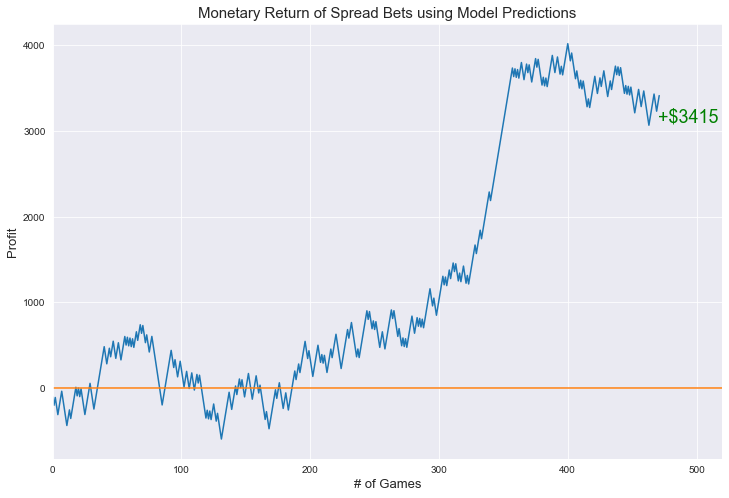

In [153]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('darkgrid')
sns.lineplot(x=lasso_test_df.index, y=lasso_test_df['Profit'])
sns.lineplot(x=np.linspace(0, 520), y=0)
plt.title('Monetary Return of Spread Bets using Model Predictions', fontsize=15)
plt.ylabel('Profit', fontsize=13)
plt.xlabel('# of Games', fontsize=13)
plt.xlim(0, 520)
ax.text(470, 3100, '+$3415', fontsize=18, color='green');

#### Ridge

In [205]:
ridge_params = {'alpha': [1, .1, .01, .001], 'fit_intercept': [True, False], 'normalize': [True, False],
                   'max_iter': [None, 1000, 500], 'solver': ['auto', 'saga', 'lbfgs']}

In [207]:
gs = GridSearchCV(estimator=Ridge(), param_grid=ridge_params, cv=5, scoring='r2')
gs.fit(X_train, y_train)
gs.best_params_

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/s

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

{'alpha': 1,
 'fit_intercept': False,
 'max_iter': None,
 'normalize': True,
 'solver': 'auto'}

In [208]:
ridge = Ridge(alpha=1, fit_intercept=False,max_iter=None, normalize=True, solver='auto')
ridge.fit(X_train, y_train)

Ridge(alpha=1, fit_intercept=False, normalize=True)

In [209]:
#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_ridge = ridge.predict(X_test)
ridge_test_df = pd.DataFrame(y_test)

ridge_test_df['Spread'] = test_set['Spread_Home']
ridge_test_df['Predicted Result'] = y_pred_ridge

In [210]:
ridge_test_df.reset_index(inplace=True)

#Add in result with spread factored in
ridge_test_df['Home Spread Result'] = ''
for ind in ridge_test_df.index:
    if (ridge_test_df['PLUS_MINUS_Home'][ind] + ridge_test_df['Spread'][ind]) > 0:
        ridge_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (ridge_test_df['PLUS_MINUS_Home'][ind] + ridge_test_df['Spread'][ind]) < 0:
        ridge_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        ridge_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
ridge_test_df['Predicted Spread Home Result'] = ''
for ind in ridge_test_df.index:
    if (ridge_test_df['Predicted Result'][ind] + ridge_test_df['Spread'][ind]) > 0:
        ridge_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (ridge_test_df['Predicted Result'][ind] + ridge_test_df['Spread'][ind]) <0:
        ridge_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        ridge_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

In [211]:
ridge_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

In [212]:
accuracy = len(ridge_test_df[ridge_test_df['Predicted Home Spread Result']==ridge_test_df['Home Spread Result']])/len(ridge_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.53178


## Four Factors (season stats) Spread Model

In [114]:
X_train = train_set[four_factors_szn_columns]
y_train = train_set.PLUS_MINUS_Home
X_test = test_set[four_factors_szn_columns]
y_test = test_set.PLUS_MINUS_Home

In [115]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cross_val = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lm, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15416
Average Cross Validation Score with Scaled Data: 0.15416


In [117]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01)
lasso.fit(X_train_sc, y_train)
cross_val = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lasso, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.16125
Average Cross Validation Score with Scaled Data: 0.15461


In [118]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01)
cross_val = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(ridge, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15501
Average Cross Validation Score with Scaled Data: 0.1541


In [119]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1)
cross_val = cross_val_score(svr, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(svr, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', cross_val.mean())
print(f'Average Cross Validation Score with Scaled Data:', cross_val_sc.mean())

Average Cross Validation Score with Normal Data: 0.15940539112882107
Average Cross Validation Score with Scaled Data: 0.15077503671458803


In [121]:
lasso_param = {'alpha':[2, 1, .5, .01, .001], 'fit_intercept':[True, False], 'normalize':[True, False],
              'max_iter':[250, 500, 1000]}

gs = GridSearchCV(estimator=Lasso(), param_grid=lasso_param, cv=5, scoring='r2')
gs.fit(X_train, y_train)
print(gs.best_params_)

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8720.637873501459, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2628.1443882985623, tolerance: 44.89526
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8720.637873501459, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anacond

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.42627651733346, tolerance: 44.89526
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23794.54522788772, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77372.28002256175, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/l

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171936.26942131962, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172487.09153816788, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169405.6493368707, tolerance: 44.89526
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/l

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65001.302979822154, tolerance: 43.260275953980674
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49791.9107164827, tolerance: 43.10499894707778
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30539.322335682868, tolerance: 43.748949970561185
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180250.2086688389, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174706.91355840824, tolerance: 44.89526
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173706.07921526796, tolerance: 44.654532
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env

{'alpha': 0.01, 'fit_intercept': False, 'max_iter': 500, 'normalize': True}


/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173435.65368212023, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180250.2086688389, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174706.91355840824, tolerance: 44.89526
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/l

In [122]:
lasso = Lasso(alpha=.01, fit_intercept=False, max_iter=500, normalize=True)
lasso.fit(X_train, y_train)

#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_lasso = lasso.predict(X_test)
lasso_test_df = pd.DataFrame(y_test)

lasso_test_df['Spread'] = test_set['Spread_Home']
lasso_test_df['Predicted Result'] = y_pred_lasso

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214678.7471395846, tolerance: 56.002204000000006
  model = cd_fast.enet_coordinate_descent(


In [123]:
lasso_test_df.reset_index(inplace=True)

#Add in result with spread factored in
lasso_test_df['Home Spread Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) < 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
lasso_test_df['Predicted Spread Home Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) <0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

lasso_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

In [124]:
accuracy = len(lasso_test_df[lasso_test_df['Predicted Home Spread Result']==lasso_test_df['Home Spread Result']])/len(lasso_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.52966


### Combo Cols Spread Model

In [126]:
X_train = train_set[simple_combo_cols]
y_train = train_set.PLUS_MINUS_Home
X_test = test_set[simple_combo_cols]
y_test = test_set.PLUS_MINUS_Home

In [127]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cross_val = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lm, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15315
Average Cross Validation Score with Scaled Data: 0.15315


In [129]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01)

cross_val = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lasso, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15601
Average Cross Validation Score with Scaled Data: 0.15388


In [130]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01)
cross_val = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(ridge, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15335
Average Cross Validation Score with Scaled Data: 0.15315


In [131]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1)
cross_val = cross_val_score(svr, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(svr, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', cross_val.mean())
print(f'Average Cross Validation Score with Scaled Data:', cross_val_sc.mean())

Average Cross Validation Score with Normal Data: 0.14995970313054938
Average Cross Validation Score with Scaled Data: 0.15117701292152985


In [132]:
lasso_param = {'alpha':[2, 1, .5, .01, .001], 'fit_intercept':[True, False], 'normalize':[True, False],
              'max_iter':[250, 500, 1000]}

gs = GridSearchCV(estimator=Lasso(), param_grid=lasso_param, cv=5, scoring='r2')
gs.fit(X_train, y_train)
print(gs.best_params_)

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136472.39141322218, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131569.0299785161, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136128.63722037448, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49964.96202518599, tolerance: 44.89526
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51706.19418005625, tolerance: 44.654532
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171297.3086863211, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107517.81096141975, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121629.3629923253, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124737.30741579359, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155903.37522175728, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153766.4415522428, tolerance: 44.89526
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151117.83029477787, tolerance: 44.654532
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176665.27480148367, tolerance: 44.654532
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180422.6483432523, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177722.41820821725, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/env

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181240.22966827088, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178867.16589642467, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182140.71044675616, tolerance: 45.1081
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs

{'alpha': 0.001, 'fit_intercept': False, 'max_iter': 500, 'normalize': True}


/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180499.98086264037, tolerance: 44.89526
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175764.49854211175, tolerance: 44.654532
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225028.09858386393, tolerance: 56.002204000000006
  model = cd_fast.enet_coordinate_descent(


In [133]:
lasso = Lasso(alpha=.001, fit_intercept=False, max_iter=500, normalize=True)
lasso.fit(X_train, y_train)

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225028.09858386393, tolerance: 56.002204000000006
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001, fit_intercept=False, max_iter=500, normalize=True)

In [134]:
#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_lasso = lasso.predict(X_test)
lasso_test_df = pd.DataFrame(y_test)

lasso_test_df['Spread'] = test_set['Spread_Home']
lasso_test_df['Predicted Result'] = y_pred_lasso

In [135]:
lasso_test_df.reset_index(inplace=True)

#Add in result with spread factored in
lasso_test_df['Home Spread Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) < 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
lasso_test_df['Predicted Spread Home Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) <0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

lasso_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

In [136]:
accuracy = len(lasso_test_df[lasso_test_df['Predicted Home Spread Result']==lasso_test_df['Home Spread Result']])/len(lasso_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.50847


### Spread Model

In [156]:
X_train = train_set[first_best_cols]
y_train = train_set.PLUS_MINUS_Home
X_test = test_set[first_best_cols]
y_test = test_set.PLUS_MINUS_Home

In [157]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cross_val = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lm, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.17098
Average Cross Validation Score with Scaled Data: 0.17098


In [160]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01)
lasso.fit(X_train_sc, y_train)
cross_val = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lasso, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.16748
Average Cross Validation Score with Scaled Data: 0.17126


In [162]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01)
cross_val = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(ridge, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.17123
Average Cross Validation Score with Scaled Data: 0.17095


In [163]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1)
cross_val = cross_val_score(svr, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(svr, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', cross_val.mean())
print(f'Average Cross Validation Score with Scaled Data:', cross_val_sc.mean())

Average Cross Validation Score with Normal Data: 0.1570759243348044
Average Cross Validation Score with Scaled Data: 0.17134923772357807


#### Ridge

In [164]:
param_grid_ridge = {'alpha': [1, .1, .01, .001], 'fit_intercept': [True, False], 'normalize': [True, False],
                   'max_iter': [None, 500, 100], 'solver': ['auto', 'svd', 'lsqr', 'saga', 'lbfgs']}

In [165]:
from sklearn.model_selection import GridSearchCV
gs_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid_ridge, cv=5, scoring='r2')
gs_ridge.fit(X_train, y_train)
gs_ridge.best_params_

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/s

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/s

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/s

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dillm

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
   

{'alpha': 0.01,
 'fit_intercept': False,
 'max_iter': None,
 'normalize': True,
 'solver': 'auto'}

In [176]:
ridge = Ridge(alpha=.1, fit_intercept=True,max_iter=None, normalize=True, solver='auto')
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True)

In [177]:
#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_ridge = ridge.predict(X_test)
ridge_test_df = pd.DataFrame(y_test)

ridge_test_df['Spread'] = test_set['Spread_Home']
ridge_test_df['Predicted Result'] = y_pred_ridge

In [178]:
ridge_test_df.reset_index(inplace=True)

#Add in result with spread factored in
ridge_test_df['Home Spread Result'] = ''
for ind in ridge_test_df.index:
    if (ridge_test_df['PLUS_MINUS_Home'][ind] + ridge_test_df['Spread'][ind]) > 0:
        ridge_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (ridge_test_df['PLUS_MINUS_Home'][ind] + ridge_test_df['Spread'][ind]) < 0:
        ridge_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        ridge_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
ridge_test_df['Predicted Spread Home Result'] = ''
for ind in ridge_test_df.index:
    if (ridge_test_df['Predicted Result'][ind] + ridge_test_df['Spread'][ind]) > 0:
        ridge_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (ridge_test_df['Predicted Result'][ind] + ridge_test_df['Spread'][ind]) <0:
        ridge_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        ridge_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

In [179]:
ridge_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

In [180]:
accuracy = len(ridge_test_df[ridge_test_df['Predicted Home Spread Result']==ridge_test_df['Home Spread Result']])/len(ridge_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.54661


#### Lasso

In [181]:
lasso_param = {'alpha':[2, 1, .5], 'fit_intercept':[True, False], 'normalize':[True, False],
              'max_iter':[500, 1000, 2500]}

In [182]:
gs = GridSearchCV(estimator=Lasso(), param_grid=lasso_param, cv=5, scoring='r2')
gs.fit(X_train, y_train)
gs.best_params_

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.68673195160227, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.68673195160227, tolerance: 44.58791600000001
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.23412724211812, tolerance: 44.763008
  model = cd_fast.enet_coordinate_descent(
/Users/dillmedd/opt/anac

{'alpha': 0.5, 'fit_intercept': False, 'max_iter': 500, 'normalize': True}

In [183]:
lasso = Lasso(alpha=.5, fit_intercept=False, max_iter=500, normalize=True)
lasso.fit(X_train, y_train)

#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_lasso = lasso.predict(X_test)
lasso_test_df = pd.DataFrame(y_test)

lasso_test_df['Spread'] = test_set['Spread_Home']
lasso_test_df['Predicted Result'] = y_pred_lasso

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631.5593070609029, tolerance: 56.002204000000006
  model = cd_fast.enet_coordinate_descent(


In [184]:
lasso_test_df.reset_index(inplace=True)

#Add in result with spread factored in
lasso_test_df['Home Spread Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) < 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
lasso_test_df['Predicted Spread Home Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) <0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

lasso_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

In [185]:
accuracy = len(lasso_test_df[lasso_test_df['Predicted Home Spread Result']==lasso_test_df['Home Spread Result']])/len(lasso_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.54025


#### Lasso scaled data

In [187]:
gs = GridSearchCV(estimator=Lasso(), param_grid=lasso_param, cv=5, scoring='r2')
gs.fit(X_train_sc, y_train)
gs.best_params_

{'alpha': 0.5, 'fit_intercept': True, 'max_iter': 500, 'normalize': False}

In [188]:
lasso = Lasso(alpha=.5, fit_intercept=False, max_iter=500, normalize=True)
lasso.fit(X_train_sc, y_train)

#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_lasso = lasso.predict(X_test_sc)
lasso_test_df = pd.DataFrame(y_test)

lasso_test_df['Spread'] = test_set['Spread_Home']
lasso_test_df['Predicted Result'] = y_pred_lasso

In [189]:
lasso_test_df.reset_index(inplace=True)

#Add in result with spread factored in
lasso_test_df['Home Spread Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (lasso_test_df['PLUS_MINUS_Home'][ind] + lasso_test_df['Spread'][ind]) < 0:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
lasso_test_df['Predicted Spread Home Result'] = ''
for ind in lasso_test_df.index:
    if (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) > 0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (lasso_test_df['Predicted Result'][ind] + lasso_test_df['Spread'][ind]) <0:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        lasso_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

lasso_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

In [190]:
accuracy = len(lasso_test_df[lasso_test_df['Predicted Home Spread Result']==lasso_test_df['Home Spread Result']])/len(lasso_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.53814


### SVR

In [194]:
svr = SVR(kernel='linear', C=1)
svr.fit(X_train_sc, y_train)

SVR(C=1, kernel='linear')

In [195]:

#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_svr = svr.predict(X_test_sc)
svr_test_df = pd.DataFrame(y_test)

svr_test_df['Spread'] = test_set['Spread_Home']
svr_test_df['Predicted Result'] = y_pred_svr

In [196]:
svr_test_df.reset_index(inplace=True)

#Add in result with spread factored in
svr_test_df['Home Spread Result'] = ''
for ind in svr_test_df.index:
    if (svr_test_df['PLUS_MINUS_Home'][ind] + svr_test_df['Spread'][ind]) > 0:
        svr_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (svr_test_df['PLUS_MINUS_Home'][ind] + svr_test_df['Spread'][ind]) < 0:
        svr_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        svr_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
svr_test_df['Predicted Spread Home Result'] = ''
for ind in svr_test_df.index:
    if (svr_test_df['Predicted Result'][ind] + svr_test_df['Spread'][ind]) > 0:
        svr_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (svr_test_df['Predicted Result'][ind] + svr_test_df['Spread'][ind]) <0:
        svr_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        svr_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

svr_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

In [197]:
accuracy = len(svr_test_df[svr_test_df['Predicted Home Spread Result']==svr_test_df['Home Spread Result']])/len(svr_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.51271


### Four Factors Model Spread ** 55.3% Accurate

In [213]:
plus_minus_cols = ['EFG_PCT LAST 7_Home',
'FTA_RATE LAST 7_Home',
'TM_TOV_PCT LAST 7_Home',
'OREB_PCT LAST 7_Home',
'OPP_EFG_PCT LAST 7_Home',
'OPP_FTA_RATE LAST 7_Home',
'OPP_TOV_PCT LAST 7_Home',
'OPP_OREB_PCT LAST 7_Home',
'EFG_PCT LAST 7_Away',
'FTA_RATE LAST 7_Away',
'TM_TOV_PCT LAST 7_Away',
'OREB_PCT LAST 7_Away',
'OPP_EFG_PCT LAST 7_Away',
'OPP_FTA_RATE LAST 7_Away',
'OPP_TOV_PCT LAST 7_Away',
'OPP_OREB_PCT LAST 7_Away',
'NET_RATING Season_Players_Home',
'NET_RATING Season_Players_Away',
'TS_PCT Season_Players_Home',
'TS_PCT Season_Players_Away',
'PIE Season_Players_Home',
'PIE Season_Players_Away']

In [214]:
X_train = train_set[plus_minus_cols]
y_train = train_set.PLUS_MINUS_Home
X_test = test_set[plus_minus_cols]
y_test = test_set.PLUS_MINUS_Home

In [215]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cross_val = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lm, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01)
cross_val = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(lasso, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

In [216]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01)
cross_val = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(ridge, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', (round(cross_val.mean(), 5)))
print(f'Average Cross Validation Score with Scaled Data:', (round(cross_val_sc.mean(),5)))

Average Cross Validation Score with Normal Data: 0.15196
Average Cross Validation Score with Scaled Data: 0.1518


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
cross_val = cross_val_score(svr, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(svr, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', cross_val.mean())
print(f'Average Cross Validation Score with Scaled Data:', cross_val_sc.mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
cross_val = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=5)
cross_val_sc = cross_val_score(rfr, X_train_sc, y_train, scoring='r2', cv=5)
print(f'Average Cross Validation Score with Normal Data:', cross_val.mean())
print(f'Average Cross Validation Score with Scaled Data:', cross_val_sc.mean())

In [ ]:
param_grid_ridge = {'alpha': [1, .1, .01, .001], 'fit_intercept': [True, False], 'normalize': [True, False],
                   'max_iter': [None, 500, 100], 'solver': ['auto', 'svd', 'lsqr', 'saga', 'lbfgs']}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid_ridge, cv=5, scoring='r2')
gs_ridge.fit(X_train, y_train)
gs_ridge.best_params_

In [217]:
ridge = Ridge(alpha=.1, fit_intercept=True,max_iter=500, normalize=True, solver='saga')
ridge.fit(X_train, y_train)

#Create DataFrame containing Home +/- results, model predictions and given spread
y_pred_ridge = ridge.predict(X_test)
ridge_test_df = pd.DataFrame(y_test)

ridge_test_df['Spread'] = test_set['Spread_Home']
ridge_test_df['Predicted Result'] = y_pred_ridge

In [218]:
ridge_test_df.reset_index(inplace=True)

#Add in result with spread factored in
ridge_test_df['Home Spread Result'] = ''
for ind in ridge_test_df.index:
    if (ridge_test_df['PLUS_MINUS_Home'][ind] + ridge_test_df['Spread'][ind]) > 0:
        ridge_test_df.at[ind, 'Home Spread Result'] = 'Yes'
    elif (ridge_test_df['PLUS_MINUS_Home'][ind] + ridge_test_df['Spread'][ind]) < 0:
        ridge_test_df.at[ind, 'Home Spread Result'] = 'No'
    else:
        ridge_test_df.at[ind, 'Home Spread Result'] = 'Push'

#Add in model's prediction         
ridge_test_df['Predicted Spread Home Result'] = ''
for ind in ridge_test_df.index:
    if (ridge_test_df['Predicted Result'][ind] + ridge_test_df['Spread'][ind]) > 0:
        ridge_test_df.at[ind, 'Predicted Home Spread Result'] = 'Yes'
    elif (ridge_test_df['Predicted Result'][ind] + ridge_test_df['Spread'][ind]) <0:
        ridge_test_df.at[ind, 'Predicted Home Spread Result'] = 'No'
    else:
        ridge_test_df.at[ind, 'Predicted Home Spread Result'] = 'Push'

In [219]:
ridge_test_df['Home Spread Result'].value_counts()

ridge_test_df.loc[ridge_test_df['Home Spread Result'] == 'Push']

,index,PLUS_MINUS_Home,Spread,Predicted Result,Home Spread Result,Predicted Spread Home Result,Predicted Home Spread Result
36,36,-4.0,4.0,-3.174621,Push,,Yes
50,50,-9.0,9.0,-1.277767,Push,,Yes
54,54,9.0,-9.0,12.403009,Push,,Yes
97,97,-3.0,3.0,1.855745,Push,,Yes
187,187,9.0,-9.0,16.921311,Push,,Yes
196,196,-2.0,2.0,4.438878,Push,,Yes
334,334,1.0,-1.0,-0.583781,Push,,No
384,384,10.0,-10.0,6.934873,Push,,No


In [221]:
ridge_test_df.drop(index=[36, 50, 54, 97, 187, 196, 334, 384], inplace=True)

In [222]:
accuracy = len(ridge_test_df[ridge_test_df['Predicted Home Spread Result']==ridge_test_df['Home Spread Result']])/len(ridge_test_df)
print(f'Accuracy of Model against the spread:', round(accuracy, 5))

Accuracy of Model against the spread: 0.55297


In [223]:
ridge_test_df.reset_index(inplace=True)

ridge_test_df['Monetary Result'] = 0
for ind in ridge_test_df.index:
    # Prediction is correct
    if ridge_test_df['Home Spread Result'].iloc[ind] == ridge_test_df['Predicted Home Spread Result'].iloc[ind]:
        ridge_test_df.at[ind, 'Monetary Result'] = 91.91
    #Prediction is wrong
    else:    
        ridge_test_df.at[ind, 'Monetary Result'] = -100
            
#Running Profit of given bets
ridge_test_df['Profit'] = ridge_test_df['Monetary Result'].cumsum()

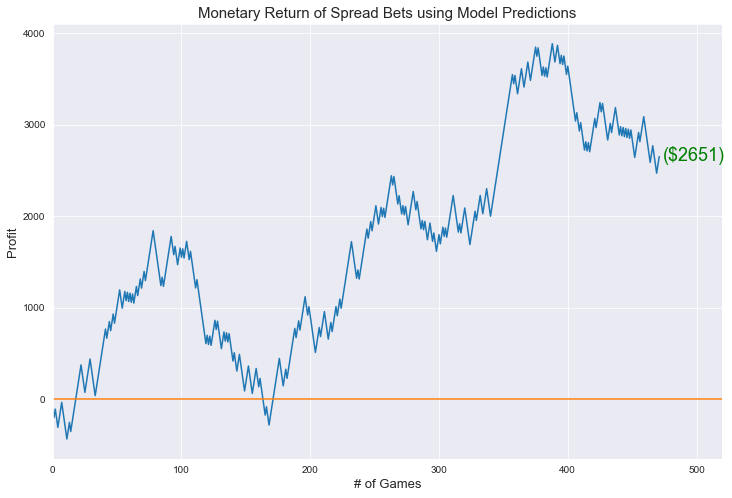

In [224]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('darkgrid')
sns.lineplot(x=ridge_test_df.index, y=ridge_test_df['Profit'])
sns.lineplot(x=np.linspace(0, 520), y=0)
plt.title('Monetary Return of Spread Bets using Model Predictions', fontsize=15)
plt.ylabel('Profit', fontsize=13)
plt.xlabel('# of Games', fontsize=13)
plt.xlim(0, 520)
ax.text(474, 2600, '($2651)', fontsize=18, color='green');